In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv(r"C:\Users\welcome\AppData\Local\Temp\Rar$DIa9088.13763\movies.csv")

In [3]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df2 = pd.read_csv(r"C:\Users\welcome\AppData\Local\Temp\Rar$DIa9088.11347\ratings.csv")

In [5]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df1.describe

<bound method NDFrame.describe of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|D

In [7]:
df2.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

In [8]:
df = pd.merge(df1,df2,on = "movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [9]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [10]:
df.isnull().sum()




movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()


title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [13]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [15]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.tail()

,rating,num of ratings
title,,
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5
¡Three Amigos! (1986),3.134615,26
À nous la liberté (Freedom for Us) (1931),1.000000,1


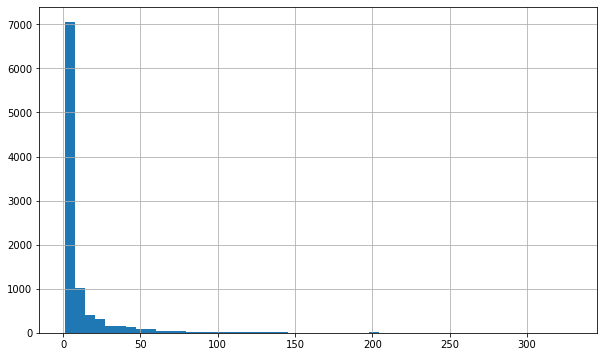

In [16]:
plt.figure(figsize=(10,6))
ratings['num of ratings'].hist(bins = 50)

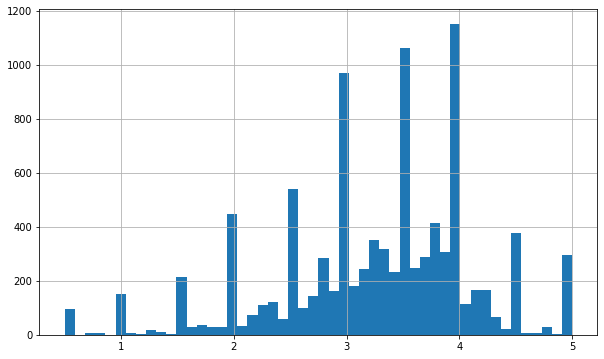

In [17]:
plt.figure(figsize =(10,6))
ratings['rating'].hist(bins = 50)

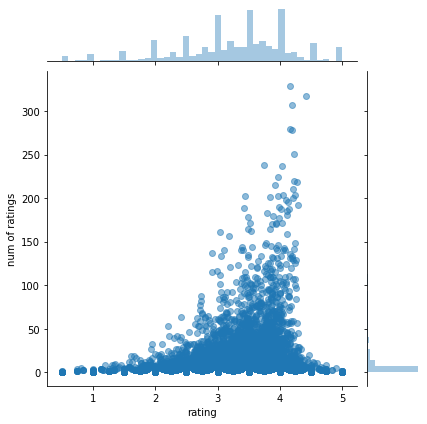

In [18]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha = 0.5)

In [19]:
## creating user iteraction matrix


In [20]:
movie_matrix = df.pivot_table(index='userId',columns= 'title',values = 'rating')

In [21]:
movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [22]:
# most rated movies
ratings.sort_values('num of ratings',ascending= False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [23]:
#Removing movies which have less than 10 users who rated it.and fill remaining null with 0
movie_matrix = movie_matrix.dropna(thresh = 5,axis = 1).fillna(0)

In [24]:
movie_matrix

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,4.5,3.5,0.0,0.0


In [25]:
##making recommendation - example movie - pulp fiction

In [26]:
#fetching ratings for the movie
pulpfiction_user_rating = movie_matrix['Pulp Fiction (1994)']

In [27]:
pulpfiction_user_rating

userId
1      3.0
2      0.0
3      0.0
4      1.0
5      5.0
      ... 
606    5.0
607    3.0
608    5.0
609    4.0
610    5.0
Name: Pulp Fiction (1994), Length: 610, dtype: float64

In [28]:
#finding similar movie to that pulpfiction movie using correlation 
similar_to_pulpfiction = movie_matrix.corrwith(pulpfiction_user_rating)


In [29]:
similar_to_pulpfiction.dropna(inplace = True)
similar_to_pulpfiction.head()

title
'burbs, The (1989)                   0.030136
(500) Days of Summer (2009)          0.074685
*batteries not included (1987)       0.088247
10 Cloverfield Lane (2016)           0.078421
10 Things I Hate About You (1999)    0.055754
dtype: float64

In [30]:
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction,columns=['correlation'])
corr_pulpfiction.dropna(inplace= True)
corr_pulpfiction.head()

,correlation
title,
"'burbs, The (1989)",0.030136
(500) Days of Summer (2009),0.074685
*batteries not included (1987),0.088247
10 Cloverfield Lane (2016),0.078421
10 Things I Hate About You (1999),0.055754


In [31]:
 corr_pulpfiction = corr_pulpfiction.join(ratings['num of ratings'])
corr_pulpfiction.head(10)

,correlation,num of ratings
title,,
"'burbs, The (1989)",0.030136,17
(500) Days of Summer (2009),0.074685,42
*batteries not included (1987),0.088247,7
10 Cloverfield Lane (2016),0.078421,14
10 Things I Hate About You (1999),0.055754,54
"10,000 BC (2008)",0.038468,17
101 Dalmatians (1996),0.059534,47
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.030890,44
102 Dalmatians (2000),0.022837,9


In [32]:
corr_pulpfiction[corr_pulpfiction['num of ratings'] > 20].sort_values(by='correlation',ascending = False).head(10)

,correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,307
Seven (a.k.a. Se7en) (1995),0.517086,203
"Usual Suspects, The (1995)",0.470340,204
"Silence of the Lambs, The (1991)",0.464080,279
Reservoir Dogs (1992),0.449298,131
Goodfellas (1990),0.443585,126
"Shawshank Redemption, The (1994)",0.413893,317
Trainspotting (1996),0.398049,102
Fargo (1996),0.394537,181


In [35]:
trainset,testset = train_test_split(df,test_size =.20)

In [ ]:
from scipy.sparse import csr_matrix


In [ ]:

movie_csr_matrix = csr_matrix(movie_matrix.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_csr_matrix)
